## Importing Library

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading Data

In [2]:
data = pd.read_csv('/Users/mohitgupta_omg/Desktop/Lecture 5/multiple_linear_regression.csv')

**A little bit of data exploration**

In [37]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


## Data Preprocessing

#### Handling NULL Value

In [39]:
data = data.dropna()

In [40]:
data.shape

(200, 4)

#### Splitting data

In [41]:
output_col = "Target" 

In [42]:
x = data.iloc[:, [0, 1]]

In [43]:
y = data.loc[:, output_col]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.30, random_state = 43)

In [47]:
x_train

,Feature 1,Feature 2
71,109.8,14.3
90,134.3,4.9
100,222.4,4.3
44,25.1,25.7
94,107.4,14.0
...,...,...
58,210.8,49.6
21,237.4,5.1
49,66.9,11.7
64,131.1,42.8


# <font color = "green">Linear Regression</font>

### Training model

In [48]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lr.coef_

array([0.04595565, 0.18011132])

In [50]:
lr.intercept_

3.0426578609718167

### Predicting Test_input

In [51]:
predicted_value = lr.predict(x_test)

In [52]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [61]:
cost

2.2349594098614394

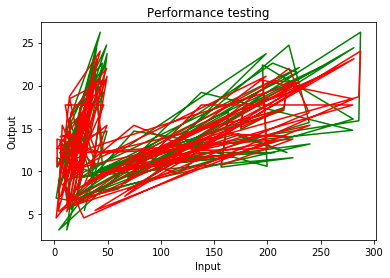

In [62]:
plt.plot(x_test, y_test, color = "green")
plt.plot(x_test, predicted_value, color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [63]:
x_with_constant = sm.add_constant(x_train)

In [64]:
model = sm.OLS(y_train, x_with_constant)

In [65]:
result = model.fit()

In [66]:
result.params

const        3.042658
Feature 1    0.045956
Feature 2    0.180111
dtype: float64

In [67]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sat, 01 Aug 2020   Prob (F-statistic):           6.70e-65
Time:                        22:15:10   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.0

In [68]:
x_test = sm.add_constant(x_test)

In [69]:
y_pred = result.predict(x_test)

In [72]:
residual = y_test - y_pred

In [80]:
residual

56    -2.939262
37    -0.673044
67     1.344106
79     1.239630
80     0.437358
188   -2.789521
183    2.195710
10     1.475028
128    2.707858
62    -1.131570
65     1.411367
17     1.293014
133    0.422561
195    2.135424
146   -2.191422
38     0.267681
173   -0.360380
149    0.356253
93     1.053006
29     1.331092
0      1.674739
2     -2.800205
122   -2.168991
180   -0.207602
95     0.661267
121   -0.815040
185    2.013413
39     1.189257
66     0.579001
19     0.483414
11     0.167992
45    -0.241997
41    -0.092526
92     0.319068
168   -0.092132
1     -1.766059
57     0.440045
189    0.618625
151    1.483773
167   -1.282865
116    0.184724
138   -0.083634
155   -2.120367
82     1.140622
160    0.169978
181   -1.856569
171    0.133311
12    -1.258310
55     2.619264
77     0.486514
22    -0.913042
129    1.757050
105    1.462893
102   -2.938555
159    0.490935
9     -2.092886
15     1.786298
150   -2.345956
76     2.305384
119   -0.215979
dtype: float64

# Homoscedasticity

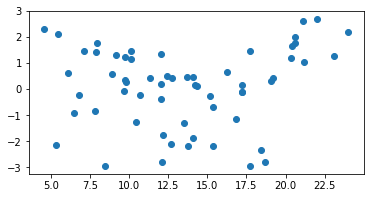

In [73]:
fig, ax = plt.subplots(figsize = (6, 3))
ax.scatter(y_pred, residual)

# Normality of Residuals

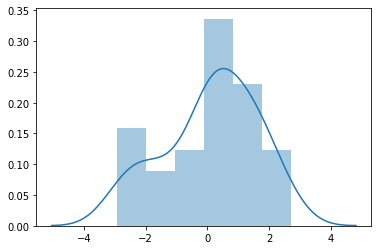

In [79]:
sns.distplot(residual)

In [83]:
np.mean(residual)

0.10766232496018703

**Keep Following and Practice more :)**

**GeeksforGeeks**